# 신용 카드 거래 데이터 시각화


https://www.dacon.io/competitions/official/42473/overview/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 시각화에서 사용할 한글 폰트 설정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
credit = pd.read_csv('./data/data_credit.csv')

In [3]:
credit.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


### 컬럼 정보

store_id: 각 파일에서의 상점 고유 번호

date: 거래일자

time: 거래 시간

card_id: 카드 번호의 hash 값

amount: 매출액, 0보다 작은 음수는 거래 취소(환불)

installments: 할부개월수, 일시불은 빈 문자열

days_of_week: 요일, 월요일이 0, 일요일은 6

holyday: 1이면 공휴일, 0이면 공휴일 아님

# ?

- 요일별 카드 사용 횟수 
    
    - 언제 가장 많이 카드를 사용 할까?(매출액)

    - 언제 가장 많이 카드로 환불을 할까?

In [5]:
# 결측치 확인
credit.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [6]:
# 결측치 이외의 값들 확인
credit['installments'].value_counts().sort_index()

2.0      3431
3.0     10686
4.0       209
5.0      1220
6.0       647
7.0        28
8.0        32
9.0        25
10.0      252
12.0      206
15.0        2
18.0       11
20.0        6
22.0        4
24.0       96
36.0        5
Name: installments, dtype: int64

In [7]:
# 결측치를 0.0으로 채우기
credit = credit.fillna(0.0)

In [8]:
# 확인
credit.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [10]:
credit[credit.where(credit['amount'] < 0)]

ValueError: Boolean array expected for the condition, not object

In [9]:
sr_day = credit.days_of_week.value_counts().sort_index()/1000
sr_day.index = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
sr_day

월요일    444.847
화요일    467.276
수요일    471.573
목요일    472.820
금요일    511.031
토요일    533.093
일요일    462.156
Name: days_of_week, dtype: float64

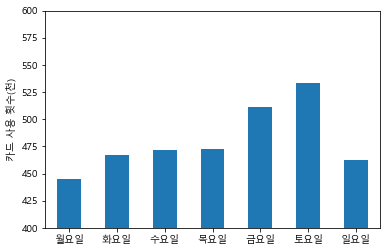

In [10]:
sr_day.plot(kind='bar')
plt.ylim(400, 600)
plt.ylabel('카드 사용 횟수(천)')
plt.xticks(rotation=0)
plt.show()